In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline


In [7]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  random_state=23)

In [9]:
X.shape

(1000, 2)

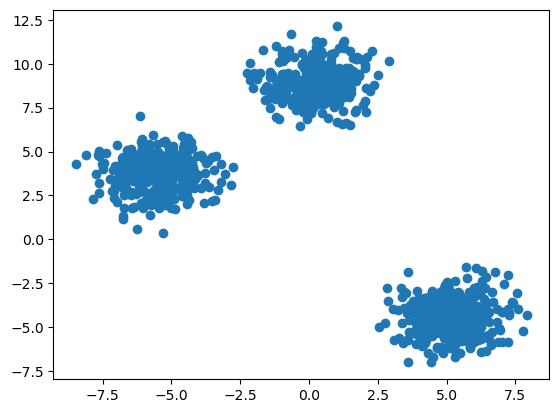

In [15]:
plt.scatter(X[:,0],X[:,1])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [21]:
from sklearn.cluster import KMeans

In [29]:
# Manual process
# elbow method to select the K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)    ## wcss value is in inertia parameter

C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

In [31]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1171.4379638359776,
 1002.1497510675889,
 904.1462606798309,
 756.3838662795157,
 693.7478922371906,
 630.2487146142249,
 548.6589489168585]

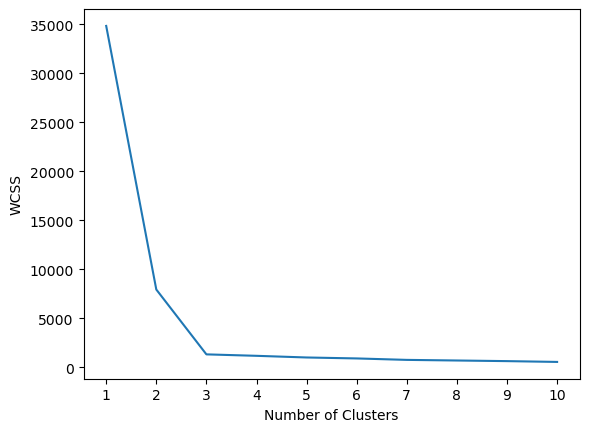

In [33]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [35]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [50]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [58]:
y_test_labels=kmeans.predict(X_test)

In [52]:
y_labels

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0,

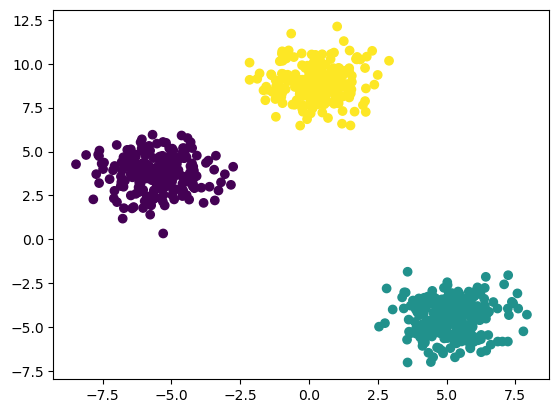

In [54]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

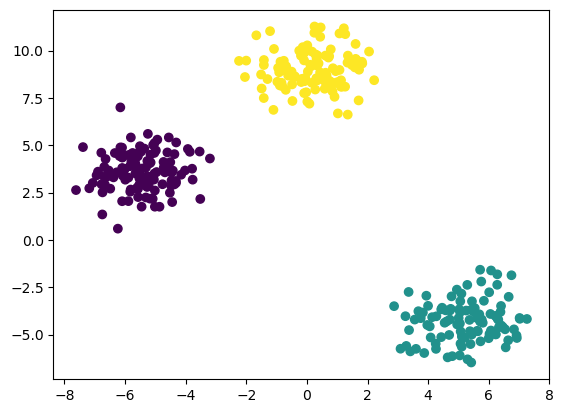

In [60]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [62]:
## knee locator
!pip install kneed

In [64]:
from kneed import KneeLocator

In [70]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [72]:
kl.elbow

3

In [74]:
##performance metrics
from sklearn.metrics import silhouette_score

In [78]:
silhouette_coefficient=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficient.append(score)

C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vishwas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

In [80]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4895647834796006,
 0.33586652470708594,
 0.3408444460914479,
 0.3495788689731991,
 0.33666274594492834,
 0.3403950962028122]

NameError: name 'plot' is not defined

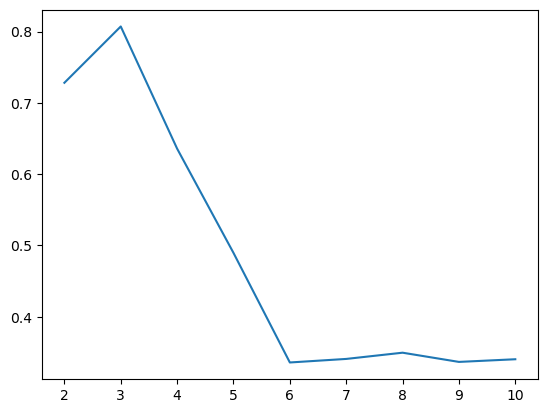

In [82]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficient)
plot.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()